# **BOOTCAMP @ GIKI (Content designed by Usama Arshad) WEEK 5**

---



## Week 5 - Fundamentals of NLP

**Introduction to Sequence Modeling**

**Theory:**

Sequence modeling is a type of modeling where the input and/or output is a sequence of data. This is commonly used in various natural language processing (NLP) tasks such as language translation, text generation, and sentiment analysis. Sequence models can capture dependencies between elements in the sequence, making them suitable for tasks where the order of data points is important.

**Common Types of Sequence Models:**

**Recurrent Neural Networks (RNNs):** These models have loops in them, allowing information to persist. They are particularly well-suited for sequential data but can suffer from vanishing gradient problems.

**Long Short-Term Memory Networks (LSTMs):** These are a type of RNN designed to remember information for long periods. They use gates to control the flow of information.

**Gated Recurrent Units (GRUs):** These are similar to LSTMs but have a simpler architecture.

**Applications of Sequence Modeling:**

* **Language Translation:** Translating text from one language to another.
* **Text Generation:** Generating new text based on a given input.
* **Speech Recognition:** Converting spoken language into text.
* **Time Series Prediction:** Predicting future values based on previously observed values.

# Preprocessing Text Data and Word Embeddings

## Theory:
Preprocessing text data is an essential step in natural language processing (NLP) to ensure that the data is clean and in a suitable format for analysis. Common preprocessing steps include tokenization, removing stop words, stemming, and lemmatization. Word embeddings are a type of word representation that allows words with similar meaning to have similar representation. They are dense vectors of real numbers, which capture semantic properties of words.

## Steps for Preprocessing Text Data:

1. **Tokenization:** Splitting the text into individual words or tokens.
2. **Removing Stop Words:** Removing common words that do not contribute much to the meaning of the sentence (e.g., "and", "the").
3. **Stemming:** Reducing words to their root form (e.g., "running" to "run").
4. **Lemmatization:** Reducing words to their base or dictionary form (e.g., "better" to "good").

## Word Embeddings:

1. **Word2Vec:** A popular word embedding technique that uses shallow neural networks to produce word vectors.
2. **GloVe:** Global Vectors for Word Representation, another technique that produces word embeddings by aggregating global word-word co-occurrence statistics.
3. **FastText:** An extension of Word2Vec that works better with rare words by considering subword information.


In [8]:
# Import necessary libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import ipywidgets as widgets
from IPython.display import display, clear_output

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stemmer, lemmatizer, and stop words
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define widgets for user input and options
text_input = widgets.Textarea(
    value='I love machine learning.\nDeep learning is a subset of machine learning.\nNatural language processing is a fascinating field.\nText preprocessing is important for NLP tasks.',
    placeholder='Enter text here...',
    description='Text:',
    layout=widgets.Layout(width='100%', height='100px')
)

preprocessing_options = widgets.SelectMultiple(
    options=['Tokenization', 'Removing Stop Words', 'Stemming', 'Lemmatization'],
    value=['Tokenization'],
    description='Preprocess:',
)

preprocess_button = widgets.Button(description='Preprocess Text')

# Display the widgets
display(text_input, preprocessing_options, preprocess_button)

# Define function for text preprocessing
def preprocess_text(text, options):
    sentences = text.strip().split('\n')  # Split the text into sentences based on newline characters
    processed_sentences = []

    for sentence in sentences:
        words = re.findall(r'\b\w+\b', sentence.lower())  # Tokenize and lower the case
        if 'Removing Stop Words' in options:
            words = [word for word in words if word not in stop_words]
        if 'Stemming' in options:
            words = [stemmer.stem(word) for word in words]
        if 'Lemmatization' in options:
            words = [lemmatizer.lemmatize(word) for word in words]
        processed_sentences.append(' '.join(words))

    # Display the processed sentences
    print("Processed Sentences:")
    for i, sent in enumerate(processed_sentences):
        print(f"Sentence {i+1}: {sent}")

    return processed_sentences

# Define the function to handle the preprocess button click
def on_preprocess_button_clicked(b):
    clear_output()  # Clear the output
    display(text_input, preprocessing_options, preprocess_button)  # Redisplay the widgets
    text = text_input.value  # Get the text from the input widget
    options = preprocessing_options.value  # Get the selected preprocessing options
    processed_sentences = preprocess_text(text, options)  # Preprocess the text

# Attach function to the button
preprocess_button.on_click(on_preprocess_button_clicked)


Textarea(value='I love ,machine learning.\nDeep learnings is a subset of machine learning.\nNatural languages …

SelectMultiple(description='Preprocess:', index=(3,), options=('Tokenization', 'Removing Stop Words', 'Stemmin…

Button(description='Preprocess Text', style=ButtonStyle())

Processed Sentences:
Sentence 1: i love machine learning
Sentence 2: deep learning is a subset of machine learning
Sentence 3: natural language processing is a fascinating field
Sentence 4: text preprocessing is important for nlp task
Sentence 5: abacus


**Base RNN with Dataset (Example)**


            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


Epoch 1/20

91/91 [==============================] - 2s 7ms/step - loss: 0.0664 - val_loss: 0.0082
Epoch 2/20
91/91 [==============================] - 0s 4ms/step - loss: 0.0093 - val_loss: 0.0075
Epoch 3/20
91/91 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.0073
Epoch 4/20
91/91 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0072
Epoch 5/20
91/91 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0072
Epoch 6/20
91/91 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0072
Epoch 7/20
91/91 [==============================] - 0s 3ms/step - loss: 0.0088 - val_loss: 0.0072
Epoch 8/20
91/91 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0072
Epoch 9/20
91/91 [==============================] - 0s 3ms/step - loss: 0.0088 - val_loss: 0.

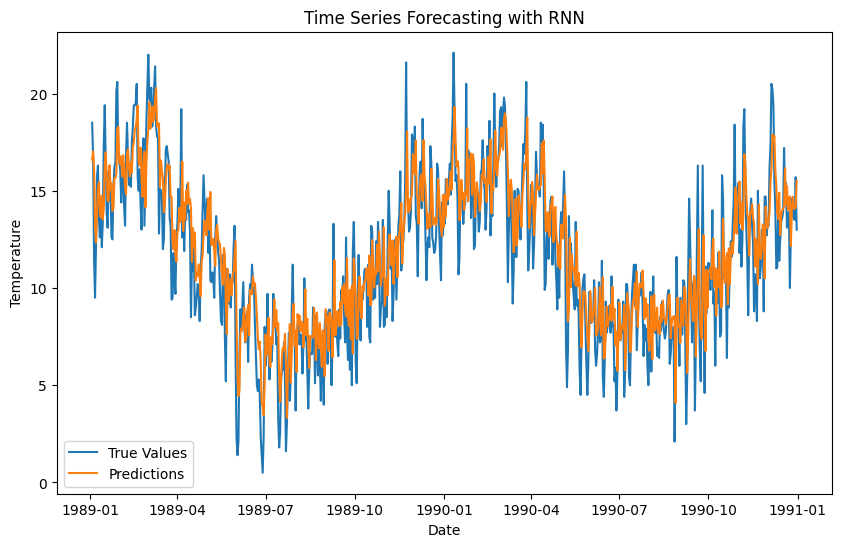

In [ ]:
# Import necessary libraries
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis
import tensorflow as tf  # For building and training the RNN model
from tensorflow.keras.models import Sequential  # For creating a sequential model
from tensorflow.keras.layers import SimpleRNN, Dense  # For adding RNN and Dense layers
import matplotlib.pyplot as plt  # For plotting the results
from sklearn.preprocessing import MinMaxScaler  # For normalizing the data

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'  # URL of the dataset
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')  # Load the dataset into a pandas DataFrame

# Display the first few rows of the dataset
print(data.head())  # Print the first 5 rows of the dataset

# Preprocess the data
values = data['Temp'].values.reshape(-1, 1)  # Extract the temperature values and reshape for scaling

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))  # Initialize the scaler with the range 0 to 1
scaled_values = scaler.fit_transform(values)  # Scale the values

# Prepare the data for the RNN
def create_dataset(data, look_back=1):
    X, y = [], []  # Initialize lists to hold the input and output sequences
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])  # Append the input sequence
        y.append(data[i + look_back, 0])  # Append the corresponding output value
    return np.array(X), np.array(y)  # Convert lists to numpy arrays

look_back = 10  # Number of previous time steps to consider for each prediction
X, y = create_dataset(scaled_values, look_back)  # Create the dataset

# Split the data into training and test sets
train_size = int(len(X) * 0.8)  # Calculate the training set size (80% of the data)
X_train, X_test = X[:train_size], X[train_size:]  # Split the input sequences
y_train, y_test = y[:train_size], y[train_size:]  # Split the output values

# Reshape the data for the RNN
print(X_train)
print("==================")
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # Reshape training input for RNN
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  # Reshape test input for RNN
print(X_train)
# Define the RNN model
model = Sequential([  # Initialize a sequential model
    SimpleRNN(50, activation='relu', input_shape=(look_back, 1)),  # Add a SimpleRNN layer with 50 units
    Dense(1)  # Add a Dense layer with 1 unit for the output
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Compile the model with Adam optimizer and mean squared error loss

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))  # Train the model for 20 epochs

# Make predictions
y_pred = model.predict(X_test)  # Predict the test set values

# Inverse transform the predictions and true values
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))  # Inverse transform the true values
y_pred_inv = scaler.inverse_transform(y_pred)  # Inverse transform the predicted values

# Plot the results
plt.figure(figsize=(10, 6))  # Create a figure
plt.plot(data.index[-len(y_test):], y_test_inv, label='True Values')  # Plot the true values
plt.plot(data.index[-len(y_test):], y_pred_inv, label='Predictions')  # Plot the predicted values
plt.title('Time Series Forecasting with RNN')  # Set the title
plt.xlabel('Date')  # Set the x-axis label
plt.ylabel('Temperature')  # Set the y-axis label
plt.legend()  # Add a legend
plt.show()  # Display the plot


**Complete Example with ALL STEPS**

Textarea(value='I love machine learning.\nDeep learning is a subset of machine learning.\nNatural language pro…

SelectMultiple(description='Preprocess:', index=(1,), options=('Tokenization', 'Removing Stop Words', 'Stemmin…

RadioButtons(description='Embedding:', disabled=True, options=('GloVe',), value='GloVe')

Button(description='Preprocess Text', style=ButtonStyle())

Button(description='Create Embeddings', style=ButtonStyle())

Button(description='Build and Train RNN', style=ButtonStyle())

Processed Sentences:
Sentence 1: love machine learning
Sentence 2: deep learning subset machine learning
Sentence 3: natural language processing fascinating field
Sentence 4: text preprocessing important nlp tasks
Tokenized Sequences:
Sentence 1: [3, 2, 1]
Sentence 2: [4, 1, 5, 2, 1]
Sentence 3: [6, 7, 8, 9, 10]
Sentence 4: [11, 12, 13, 14, 15]


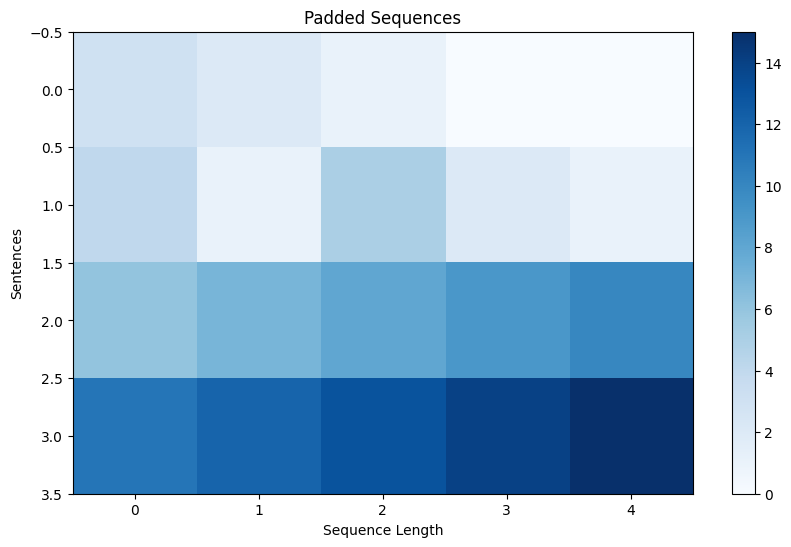

In [6]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('wordnet')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define a small subset of GloVe-like embeddings for demonstration
embeddings_index = {
    "i": np.array([0.418, 0.24968, -0.41242, 0.1217, 0.34527]),
    "love": np.array([0.29546, 0.51457, -0.06239, 0.3919, -0.09803]),
    "machine": np.array([-0.01849, 0.15567, -0.09751, -0.27085, -0.54093]),
    "learning": np.array([0.05151, -0.02842, -0.0691, 0.01351, -0.2887]),
    "deep": np.array([0.05918, -0.17239, 0.22948, -0.40452, -0.28656]),
    "is": np.array([0.36878, -0.03464, -0.17219, -0.31021, 0.18547]),
    "a": np.array([-0.21857, 0.29912, -0.22479, 0.31387, 0.19688]),
    "subset": np.array([-0.08148, 0.14264, 0.23622, 0.377, -0.30759]),
    "of": np.array([0.19599, 0.18169, 0.28512, 0.11554, 0.1719]),
    "natural": np.array([0.16276, 0.01198, -0.0236, 0.04867, -0.07137]),
    "language": np.array([0.27682, 0.37787, 0.13416, 0.05374, -0.11226]),
    "processing": np.array([-0.05562, -0.01482, 0.21939, -0.17357, -0.20376]),
    "fascinating": np.array([-0.21567, 0.3813, 0.0953, 0.2854, -0.4789]),
    "field": np.array([0.2841, -0.1407, 0.1935, 0.1861, 0.2367]),
    "text": np.array([0.1485, 0.2541, 0.0846, -0.1889, -0.2581]),
    "preprocessing": np.array([-0.2094, -0.1806, 0.1922, 0.2034, -0.0943]),
    "important": np.array([0.2928, 0.0421, -0.1681, -0.2842, 0.0345]),
    "for": np.array([0.2111, 0.1067, 0.1805, -0.1238, -0.0954]),
    "nlp": np.array([0.1952, -0.0045, 0.2712, 0.3749, -0.3425]),
    "tasks": np.array([0.1104, 0.2035, -0.0237, -0.2541, 0.1931])
}

# Define widgets for user input and options
text_input = widgets.Textarea(
    value='I love machine learning.\nDeep learning is a subset of machine learning.\nNatural language processing is a fascinating field.\nText preprocessing is important for NLP tasks.',
    placeholder='Enter text here...',
    description='Text:',
    layout=widgets.Layout(width='100%', height='100px')
)

preprocessing_options = widgets.SelectMultiple(
    options=['Tokenization', 'Removing Stop Words', 'Stemming', 'Lemmatization'],
    value=['Tokenization'],
    description='Preprocess:',
    disabled=False
)

embedding_type = widgets.RadioButtons(
    options=['GloVe'],
    value='GloVe',
    description='Embedding:',
    disabled=True  # Only GloVe is supported in this example
)

preprocess_button = widgets.Button(description='Preprocess Text')
embedding_button = widgets.Button(description='Create Embeddings')
rnn_button = widgets.Button(description='Build and Train RNN')

# Display the widgets
display(text_input, preprocessing_options, embedding_type, preprocess_button, embedding_button, rnn_button)

# Define functions for text preprocessing
def preprocess_text(text, options):
    sentences = text.strip().split('\n')  # Split the text into sentences based on newline characters
    processed_sentences = []

    for sentence in sentences:
        words = re.findall(r'\b\w+\b', sentence.lower())  # Tokenize and lower the case
        if 'Removing Stop Words' in options:
            words = [word for word in words if word not in ENGLISH_STOP_WORDS]
        if 'Stemming' in options:
            words = [stemmer.stem(word) for word in words]
        if 'Lemmatization' in options:
            words = [lemmatizer.lemmatize(word) for word in words]
        processed_sentences.append(' '.join(words))

    tokenizer = Tokenizer()  # Initialize the tokenizer
    tokenizer.fit_on_texts(processed_sentences)  # Fit the tokenizer on the sentences
    sequences = tokenizer.texts_to_sequences(processed_sentences)  # Convert sentences to sequences of integers
    padded_sequences = pad_sequences(sequences, padding='post')  # Pad the sequences to ensure uniform length

    # Display the processed sentences
    print("Processed Sentences:")
    for i, sent in enumerate(processed_sentences):
        print(f"Sentence {i+1}: {sent}")

    # Display the tokenized sequences
    print("Tokenized Sequences:")
    for i, seq in enumerate(sequences):
        print(f"Sentence {i+1}: {seq}")

    # Visualize the padded sequences
    plt.figure(figsize=(10, 6))
    plt.title('Padded Sequences')
    plt.imshow(padded_sequences, cmap='Blues', aspect='auto')
    plt.colorbar()
    plt.xlabel('Sequence Length')
    plt.ylabel('Sentences')
    plt.show()

    return tokenizer, padded_sequences, processed_sentences

# Define function to create embedding matrix
def create_embedding_matrix(tokenizer, embedding_dim=5, embedding_type='GloVe'):
    word_index = tokenizer.word_index  # Get the word index from the tokenizer
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))  # Initialize the embedding matrix with zeros
    for word, i in word_index.items():  # Iterate through the word index
        embedding_vector = embeddings_index.get(word)  # Get the embedding vector for the word
        if embedding_vector is not None:  # Check if the embedding vector exists
            embedding_matrix[i] = embedding_vector  # Store the embedding vector in the embedding matrix

    # Visualize the embedding matrix for a few words
    words_to_visualize = list(word_index.keys())[:10]  # Visualize embeddings for the first 10 words
    embeddings_to_visualize = [embedding_matrix[word_index[word]] for word in words_to_visualize]

    plt.figure(figsize=(10, 6))
    plt.title('Word Embeddings')
    for i, word in enumerate(words_to_visualize):
        plt.scatter(embeddings_to_visualize[i][0], embeddings_to_visualize[i][1])
        plt.annotate(word, (embeddings_to_visualize[i][0], embeddings_to_visualize[i][1]))
    plt.xlabel('Embedding Dimension 1')
    plt.ylabel('Embedding Dimension 2')
    plt.show()

    return embedding_matrix

# Define the function to handle the preprocess button click
def on_preprocess_button_clicked(b):
    clear_output()  # Clear the output
    display(text_input, preprocessing_options, embedding_type, preprocess_button, embedding_button, rnn_button)  # Redisplay the widgets
    text = text_input.value  # Get the text from the input widget
    options = preprocessing_options.value  # Get the selected preprocessing options
    tokenizer, padded_sequences, sentences = preprocess_text(text, options)  # Preprocess the text
    preprocess_button.tokenizer = tokenizer  # Store the tokenizer in the button object for later use
    preprocess_button.padded_sequences = padded_sequences  # Store the padded sequences in the button object for later use
    preprocess_button.sentences = sentences  # Store the sentences in the button object for later use

# Define the function to handle the embedding button click
def on_embedding_button_clicked(b):
    if hasattr(preprocess_button, 'tokenizer'):  # Check if the tokenizer is available
        tokenizer = preprocess_button.tokenizer  # Retrieve the tokenizer
        padded_sequences = preprocess_button.padded_sequences  # Retrieve the padded sequences
        embedding_matrix = create_embedding_matrix(tokenizer, embedding_type=embedding_type.value)  # Create the embedding matrix
        preprocess_button.embedding_matrix = embedding_matrix  # Store the embedding matrix in the button object for later use
    else:
        display(widgets.HTML('<h4>Please preprocess the text first!</h4>'))  # Display a message if text is not preprocessed

# Define the function to handle the RNN button click
def on_rnn_button_clicked(b):
    if hasattr(preprocess_button, 'tokenizer') and hasattr(preprocess_button, 'embedding_matrix'):  # Check if the necessary data is available
        tokenizer = preprocess_button.tokenizer  # Retrieve the tokenizer
        padded_sequences = preprocess_button.padded_sequences  # Retrieve the padded sequences
        embedding_matrix = preprocess_button.embedding_matrix  # Retrieve the embedding matrix

        # Define the RNN model with embedding layer
        model = Sequential()
        # Add an Embedding layer with the prepared embedding matrix
        model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                            output_dim=5,  # Using 5 dimensions for this example
                            weights=[embedding_matrix],
                            input_length=padded_sequences.shape[1],
                            trainable=False))
        # Add a SimpleRNN layer with 10 units
        model.add(SimpleRNN(10))
        # Add a Dense layer with a sigmoid activation function
        model.add(Dense(1, activation='sigmoid'))

        # Compile the model
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Summary of the model
        model.summary()

        # Dummy binary labels for training data
        y_train = np.array([1, 1, 0, 0])  # Example labels

        # Train the model
        history = model.fit(padded_sequences, y_train, epochs=10, batch_size=2, verbose=0)

        # Visualize the training loss and accuracy
        plt.figure(figsize=(10, 6))
        plt.plot(history.history['loss'], label='Loss')
        plt.plot(history.history['accuracy'], label='Accuracy')
        plt.title('Training Loss and Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

        # Test the model with new data
        test_sentences = ['I love NLP', 'Deep learning is amazing']  # Example test sentences
        test_sequences = tokenizer.texts_to_sequences(test_sentences)  # Convert test sentences to sequences of integers
        test_padded_sequences = pad_sequences(test_sequences, padding='post', maxlen=padded_sequences.shape[1])  # Pad the test sequences to match the training sequence length
        predictions = model.predict(test_padded_sequences)  # Get model predictions on the test data

        # Display the predictions
        print("Predictions:")
        for i, pred in enumerate(predictions):
            print(f"Sentence: {test_sentences[i]} - Prediction: {pred[0]:.4f}")
    else:
        display(widgets.HTML('<h4>Please preprocess the text and create embeddings first!</h4>'))  # Display a message if necessary data is not available

# Attach functions to buttons
preprocess_button.on_click(on_preprocess_button_clicked)
embedding_button.on_click(on_embedding_button_clicked)
rnn_button.on_click(on_rnn_button_clicked)


**Next Professional step**

Textarea(value='I love machine learning.\nDeep learning is a subset of machine learning.\nNatural language pro…

SelectMultiple(description='Preprocess:', index=(0,), options=('Tokenization', 'Removing Stop Words', 'Stemmin…

RadioButtons(description='Embedding:', index=1, options=('Word2Vec', 'GloVe', 'FastText'), value='GloVe')

Button(description='Preprocess Text', style=ButtonStyle())

Button(description='Create Embeddings', style=ButtonStyle())

Button(description='Build and Train RNN', style=ButtonStyle())

Processed Sentences:
Sentence 1: i love machine learning
Sentence 2: deep learning is a subset of machine learning
Sentence 3: natural language processing is a fascinating field
Sentence 4: text preprocessing is important for nlp tasks
Tokenized Sequences:
Sentence 1: [5, 6, 3, 1]
Sentence 2: [7, 1, 2, 4, 8, 9, 3, 1]
Sentence 3: [10, 11, 12, 2, 4, 13, 14]
Sentence 4: [15, 16, 2, 17, 18, 19, 20]


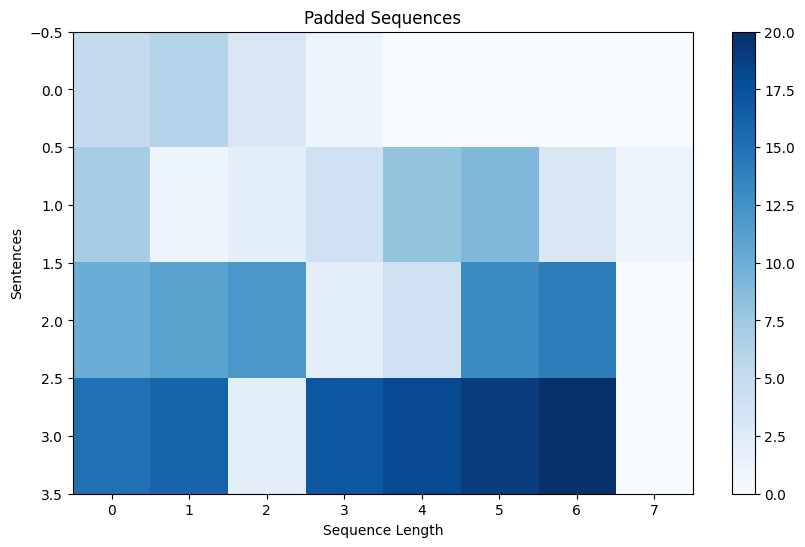

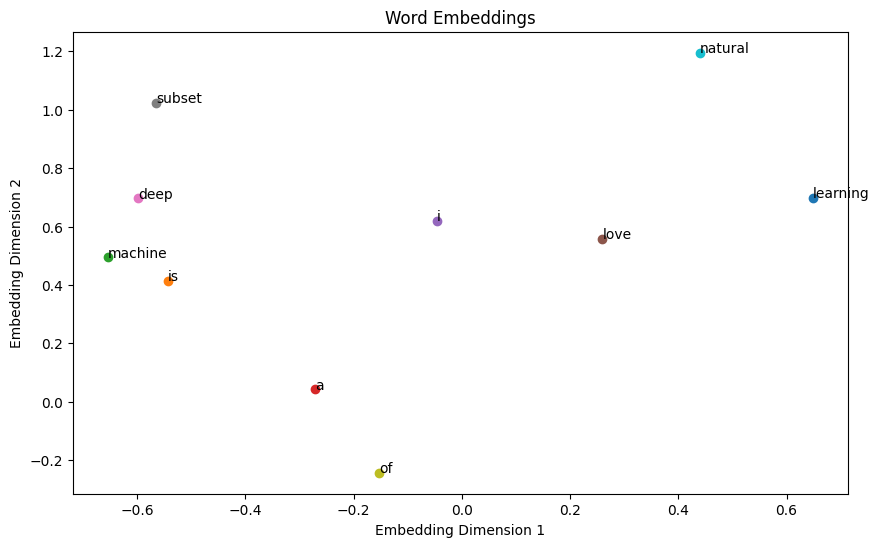

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 8, 100)            2100      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 10)                1110      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3221 (12.58 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 2100 (8.20 KB)
_________________________________________________________________



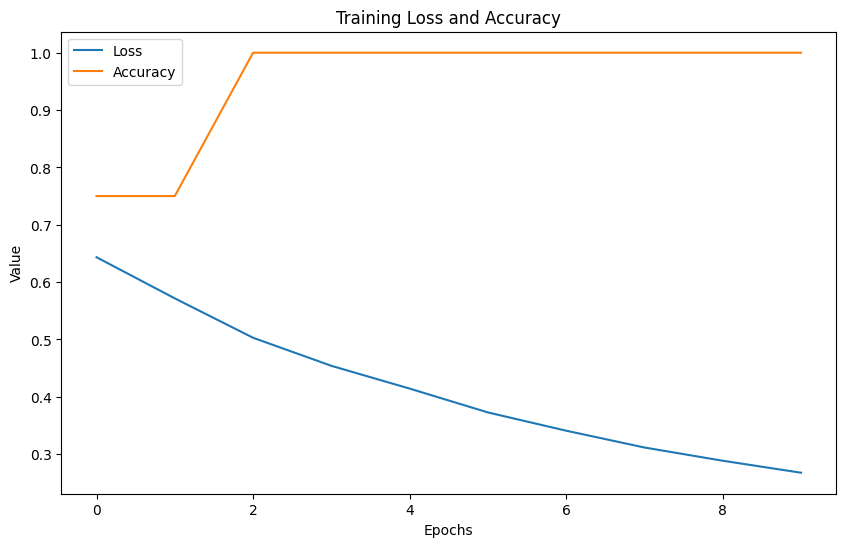

1/1 [==============================] - 0s 280ms/step
Predictions:
Sentence: I love NLP - Prediction: 0.4324
Sentence: Deep learning is amazing - Prediction: 0.6469


In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('wordnet')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Load pre-trained GloVe embeddings
embeddings_index = {}
# Ensure glove.6B.100d.txt is in the current directory
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:  # Iterate through each line in the file
        values = line.split()  # Split the line into values
        word = values[0]  # The first value is the word
        coefs = np.asarray(values[1:], dtype='float32')  # The remaining values are the coefficients
        embeddings_index[word] = coefs  # Store the word and coefficients in the dictionary

# Define widgets for user input and options
text_input = widgets.Textarea(
    value='I love machine learning.\nDeep learning is a subset of machine learning.\nNatural language processing is a fascinating field.\nText preprocessing is important for NLP tasks.',
    placeholder='Enter text here...',
    description='Text:',
    layout=widgets.Layout(width='100%', height='100px')
)

preprocessing_options = widgets.SelectMultiple(
    options=['Tokenization', 'Removing Stop Words', 'Stemming', 'Lemmatization'],
    value=['Tokenization'],
    description='Preprocess:',
    disabled=False
)

embedding_type = widgets.RadioButtons(
    options=['Word2Vec', 'GloVe', 'FastText'],
    value='GloVe',
    description='Embedding:',
    disabled=False
)

preprocess_button = widgets.Button(description='Preprocess Text')
embedding_button = widgets.Button(description='Create Embeddings')
rnn_button = widgets.Button(description='Build and Train RNN')

# Display the widgets
display(text_input, preprocessing_options, embedding_type, preprocess_button, embedding_button, rnn_button)

# Define functions for text preprocessing
def preprocess_text(text, options):
    sentences = text.strip().split('\n')  # Split the text into sentences based on newline characters
    processed_sentences = []

    for sentence in sentences:
        words = re.findall(r'\b\w+\b', sentence.lower())  # Tokenize and lower the case
        if 'Removing Stop Words' in options:
            words = [word for word in words if word not in ENGLISH_STOP_WORDS]
        if 'Stemming' in options:
            words = [stemmer.stem(word) for word in words]
        if 'Lemmatization' in options:
            words = [lemmatizer.lemmatize(word) for word in words]
        processed_sentences.append(' '.join(words))

    tokenizer = Tokenizer()  # Initialize the tokenizer
    tokenizer.fit_on_texts(processed_sentences)  # Fit the tokenizer on the sentences
    sequences = tokenizer.texts_to_sequences(processed_sentences)  # Convert sentences to sequences of integers
    padded_sequences = pad_sequences(sequences, padding='post')  # Pad the sequences to ensure uniform length

    # Display the processed sentences
    print("Processed Sentences:")
    for i, sent in enumerate(processed_sentences):
        print(f"Sentence {i+1}: {sent}")

    # Display the tokenized sequences
    print("Tokenized Sequences:")
    for i, seq in enumerate(sequences):
        print(f"Sentence {i+1}: {seq}")

    # Visualize the padded sequences
    plt.figure(figsize=(10, 6))
    plt.title('Padded Sequences')
    plt.imshow(padded_sequences, cmap='Blues', aspect='auto')
    plt.colorbar()
    plt.xlabel('Sequence Length')
    plt.ylabel('Sentences')
    plt.show()

    return tokenizer, padded_sequences, processed_sentences

# Define function to create embedding matrix
def create_embedding_matrix(tokenizer, embedding_dim=100, embedding_type='GloVe'):
    word_index = tokenizer.word_index  # Get the word index from the tokenizer
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))  # Initialize the embedding matrix with zeros
    for word, i in word_index.items():  # Iterate through the word index
        embedding_vector = embeddings_index.get(word)  # Get the embedding vector for the word
        if embedding_vector is not None:  # Check if the embedding vector exists
            embedding_matrix[i] = embedding_vector  # Store the embedding vector in the embedding matrix

    # Visualize the embedding matrix for a few words
    words_to_visualize = list(word_index.keys())[:10]  # Visualize embeddings for the first 10 words
    embeddings_to_visualize = [embedding_matrix[word_index[word]] for word in words_to_visualize]

    plt.figure(figsize=(10, 6))
    plt.title('Word Embeddings')
    for i, word in enumerate(words_to_visualize):
        plt.scatter(embeddings_to_visualize[i][0], embeddings_to_visualize[i][1])
        plt.annotate(word, (embeddings_to_visualize[i][0], embeddings_to_visualize[i][1]))
    plt.xlabel('Embedding Dimension 1')
    plt.ylabel('Embedding Dimension 2')
    plt.show()

    return embedding_matrix

# Define the function to handle the preprocess button click
def on_preprocess_button_clicked(b):
    clear_output()  # Clear the output
    display(text_input, preprocessing_options, embedding_type, preprocess_button, embedding_button, rnn_button)  # Redisplay the widgets
    text = text_input.value  # Get the text from the input widget
    options = preprocessing_options.value  # Get the selected preprocessing options
    tokenizer, padded_sequences, sentences = preprocess_text(text, options)  # Preprocess the text
    preprocess_button.tokenizer = tokenizer  # Store the tokenizer in the button object for later use
    preprocess_button.padded_sequences = padded_sequences  # Store the padded sequences in the button object for later use
    preprocess_button.sentences = sentences  # Store the sentences in the button object for later use

# Define the function to handle the embedding button click
def on_embedding_button_clicked(b):
    if hasattr(preprocess_button, 'tokenizer'):  # Check if the tokenizer is available
        tokenizer = preprocess_button.tokenizer  # Retrieve the tokenizer
        padded_sequences = preprocess_button.padded_sequences  # Retrieve the padded sequences
        embedding_matrix = create_embedding_matrix(tokenizer, embedding_type=embedding_type.value)  # Create the embedding matrix
        preprocess_button.embedding_matrix = embedding_matrix  # Store the embedding matrix in the button object for later use
    else:
        display(widgets.HTML('<h4>Please preprocess the text first!</h4>'))  # Display a message if text is not preprocessed

# Define the function to handle the RNN button click
def on_rnn_button_clicked(b):
    if hasattr(preprocess_button, 'tokenizer') and hasattr(preprocess_button, 'embedding_matrix'):  # Check if the necessary data is available
        tokenizer = preprocess_button.tokenizer  # Retrieve the tokenizer
        padded_sequences = preprocess_button.padded_sequences  # Retrieve the padded sequences
        embedding_matrix = preprocess_button.embedding_matrix  # Retrieve the embedding matrix

        # Define the RNN model with embedding layer
        model = Sequential()
        # Add an Embedding layer with the prepared embedding matrix
        model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                            output_dim=100,
                            weights=[embedding_matrix],
                            input_length=padded_sequences.shape[1],
                            trainable=False))
        # Add a SimpleRNN layer with 10 units
        model.add(SimpleRNN(10))
        # Add a Dense layer with a sigmoid activation function
        model.add(Dense(1, activation='sigmoid'))

        # Compile the model
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Summary of the model
        model.summary()

        # Dummy binary labels for training data
        y_train = np.array([1, 1, 0, 0])  # Example labels

        # Train the model
        history = model.fit(padded_sequences, y_train, epochs=10, batch_size=2, verbose=0)

        # Visualize the training loss and accuracy
        plt.figure(figsize=(10, 6))
        plt.plot(history.history['loss'], label='Loss')
        plt.plot(history.history['accuracy'], label='Accuracy')
        plt.title('Training Loss and Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

        # Test the model with new data
        test_sentences = ['I love NLP', 'Deep learning is amazing']  # Example test sentences
        test_sequences = tokenizer.texts_to_sequences(test_sentences)  # Convert test sentences to sequences of integers
        test_padded_sequences = pad_sequences(test_sequences, padding='post', maxlen=padded_sequences.shape[1])  # Pad the test sequences to match the training sequence length
        predictions = model.predict(test_padded_sequences)  # Get model predictions on the test data

        # Display the predictions
        print("Predictions:")
        for i, pred in enumerate(predictions):
            print(f"Sentence: {test_sentences[i]} - Prediction: {pred[0]:.4f}")
    else:
        display(widgets.HTML('<h4>Please preprocess the text and create embeddings first!</h4>'))  # Display a message if necessary data is not available

# Attach functions to buttons
preprocess_button.on_click(on_preprocess_button_clicked)
embedding_button.on_click(on_embedding_button_clicked)
rnn_button.on_click(on_rnn_button_clicked)
